In [ ]:
#import packages
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data
import graphviz
from sklearn.metrics import accuracy_score

In [ ]:
#this is necessary for reading files from Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read in data
data_MD_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_MD_10-19_xlsx.xlsx')
data_WA_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_WA_10-19_xlsx.xlsx')
data_CT_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_CT_10-19_xlsx.xlsx')
data_FL_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_FL_10-19_xlsx.xlsx')
data_TX_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_TX_10-19_xlsx.xlsx')
data_CO_cause_of_death = pd.read_excel('drive/My Drive/DATA602_project_materials/data/cause_of_death_CO_10-19_xlsx.xlsx')
data_CDC_cause_categories = pd.read_excel('drive/My Drive/DATA602_project_materials/data/CDC_cause_categories.xlsx')
data_income_10_11 = pd.read_excel('drive/My Drive/DATA602_project_materials/data/income_10-11.xlsx',
                                  skiprows=5)
data_income_12_13 = pd.read_excel('drive/My Drive/DATA602_project_materials/data/income_12-13.xlsx',
                                  skiprows=5)
data_income_14_16 = pd.read_excel('drive/My Drive/DATA602_project_materials/data/income_14-16.xlsx',
                                  skiprows=5)
data_income_17_19 = pd.read_excel('drive/My Drive/DATA602_project_materials/data/income_17-19.xlsx',
                                  skiprows=5)
data_deaths = pd.read_excel('drive/My Drive/DATA602_project_materials/data/total_deaths_xlsx.xlsx')
data_air_2010 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2010.csv')
data_air_2011 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2011.csv')
data_air_2012 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2012.csv')
data_air_2013 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2013.csv')
data_air_2014 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2014.csv')
data_air_2015 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2015.csv')
data_air_2016 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2016.csv')
data_air_2017 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2017.csv')
data_air_2018 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2018.csv')
data_air_2019 = pd.read_csv('drive/My Drive/DATA602_project_materials/data/EPA_2019.csv')
data_insurance_2019 = pd.read_excel('drive/My Drive/DATA602_project_materials/data/public_coverage_census.xlsx',
                                    sheet_name='Data')
#data_insurance_5yr = pd.read_csv('drive/My Drive/DATA602_project_materials/data/census_insured_5yr.csv')

In [ ]:
#this function takes a dataframe and column name that contains the location name
#returns a state for the columns that are "County, State"
def get_state_col(df, col_name):

  #split the value in the county column and grab the last item 
  #in the resulting list
  state = df[col_name].strip('*').split()[-1]

  return state

In [ ]:
#this function takes a dataframe and column name that contains the location name
#returns just the county name for the columns that are "County, State"
def get_county_col(df, col_name):

  #index the string in the county column to grab all
  #but the last 4 positions (", state")
  county = df[col_name].strip('*')[:-4]
  
  return county

In [ ]:
#create a dataframe that combines all states' cause of death data
#but dropping some unnecessary columns
cause_of_death_df = data_MD_cause_of_death.append([data_CT_cause_of_death,
                                                   data_FL_cause_of_death, 
                                                   data_TX_cause_of_death,
                                                   data_WA_cause_of_death,
                                                   data_CO_cause_of_death],
                                                  ignore_index=True)

cause_of_death_df = cause_of_death_df.drop(['Notes', 'Crude Rate', 'Year Code',
                                            'County Code'], axis=1)

#use the get_state_col and get_county_col functions
cause_of_death_df['State'] = cause_of_death_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
cause_of_death_df['County'] = cause_of_death_df.apply(lambda x: get_county_col(x, 'County'), axis=1)
#cause_of_death_df.tail()

In [ ]:
insurance_df = data_insurance_2019.drop(['Unnamed: 0'], axis=1)
cols = [c for c in insurance_df.columns if c.lower()[:7] != 'unnamed']

insurance_df.head()
#len(cols)

,"Baldwin County, Alabama",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"Calhoun County, Alabama",Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,"Cullman County, Alabama",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,"DeKalb County, Alabama",Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,"Elmore County, Alabama",Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,"Etowah County, Alabama",Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,"Houston County, Alabama",Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 5001,Unnamed: 5002,Unnamed: 5003,Unnamed: 5004,"Mayagüez Municipio, Puerto Rico",Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,"Ponce Municipio, Puerto Rico",Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015,Unnamed: 5016,"San Juan Municipio, Puerto Rico",Unnamed: 5018,Unnamed: 5019,Unnamed: 5020,Unnamed: 5021,Unnamed: 5022,"Toa Alta Municipio, Puerto Rico",Unnamed: 5024,Unnamed: 5025,Unnamed: 5026,Unnamed: 5027,Unnamed: 5028,"Toa Baja Municipio, Puerto Rico",Unnamed: 5030,Unnamed: 5031,Unnamed: 5032,Unnamed: 5033,Unnamed: 5034,"Trujillo Alto Municipio, Puerto Rico",Unnamed: 5036,Unnamed: 5037,Unnamed: 5038,Unnamed: 5039,Unnamed: 5040
0,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,...,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN,Total,NaN,Public Coverage,NaN,Percent Public Coverage,NaN
1,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
2,"220,911","86,564",39.2%,"111,075","43,304",39.0%,"82,841","33,841",40.9%,"70,392","27,417",38.9%,"75,409","26,696",35.4%,"101,470","40,091",39.5%,"104,604","43,175",41.3%,"652,965","235,956",36.1%,"91,845","33,608",36.6%,"163,952","45,486",27.7%,"95,533","30,811",32.3%,"366,888","112,262",30.6%,"95,953","38,155",39.8%,"409,112",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(X),"52,251",23.7%,(X),"23,617",21.3%,(X),"19,667",23.7%,(X),"13,179",18.7%,(X),"15,333",20.3%,(X),"23,015",22.7%,(X),"23,643",22.6%,(

In [ ]:
#same process for the income dataframes
income_10_11_df = data_income_10_11.drop(['GeoFips', 'LineCode'], axis=1)

income_10_11_df['State'] = income_10_11_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_10_11_df['County'] = income_10_11_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_10_11_df.tail()

In [ ]:
#same process for the income dataframes
income_12_13_df = data_income_12_13.drop(['GeoFips', 'LineCode'], axis=1)

income_12_13_df['State'] = income_12_13_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_12_13_df['County'] = income_12_13_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_12_13_df.tail()

In [ ]:
#same process for the income dataframes
income_14_16_df = data_income_14_16.drop(['GeoFips', 'LineCode'], axis=1)

income_14_16_df['State'] = income_14_16_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_14_16_df['County'] = income_14_16_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_14_16_df.tail()

In [ ]:
#same process for the income dataframes
income_17_19_df = data_income_17_19.drop(['GeoFips', 'LineCode'], axis=1)

income_17_19_df['State'] = income_17_19_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_17_19_df['County'] = income_17_19_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_17_19_df.tail()

In [ ]:
#the values in the "Description" column in the income dataframes should
#be columns and the years should be row values
#this function uses the melt function to do that
#it takes the dataframe and a list of the years that are column names that
#we want to be in the rows
def melt_income_df(df, value_vars_list):

  new_df = df.melt(id_vars=['County', 'State', 'Description'],
                                             value_vars=value_vars_list, 
                                             var_name='Year')
  
  return new_df

In [ ]:
#use the melt_income_df function to switch the columns and rows
income_10_11_pivot_df = melt_income_df(income_10_11_df, ['2010','2011'])
#income_10_11_pivot_df.tail()

In [ ]:
#follow the same process for all income dataframes
income_12_13_pivot_df = melt_income_df(income_12_13_df, ['2012','2013'])
income_14_16_pivot_df = melt_income_df(income_14_16_df, ['2014','2015','2016'])
income_17_19_pivot_df = melt_income_df(income_17_19_df, ['2017','2018','2019'])

In [ ]:
#append the income dataframes together
income_df = income_10_11_pivot_df.append(income_12_13_pivot_df)
income_df = income_df.append(income_14_16_pivot_df)
income_df = income_df.append(income_17_19_pivot_df)

In [ ]:
#strip some extra characters from description column
income_df['Description'] = income_df['Description'].str.strip('12/ ')

#drop some rows with extra info
income_df = income_df.loc[(income_df['Description'] != 'Personal income (thousands of dollars)') &
                          (income_df['Description'] != 'Population (persons)')]

#rename "value" column to something more descriptive
income_df = income_df.rename(columns={'value':'per_capita_income_dollars'}).drop('Description', axis=1)

In [ ]:
#make county names consistent with MD death dataframe
income_df['County'] = income_df['County'] + ' County'
income_df.loc[income_df['County'] == 
              'Baltimore (Independent City) County','County'] = 'Baltimore city'

In [ ]:
#drop unnecessary columns
deaths_df = data_deaths.drop(['Year Code', 'Crude Rate'], axis=1)

#get county and state columns
deaths_df['State'] = deaths_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
deaths_df['County'] = deaths_df.apply(lambda x: get_county_col(x, 'County'), axis=1)

#rename "Deaths" column to "Total Deaths"
deaths_df = deaths_df.rename(columns={'Deaths':'Total Deaths'})

#deaths_df.tail()

In [ ]:
#remove the decimal from cause of death code so this column can be linked
#to the more-general cause of death categories from CDC
def get_cause_code(df):
  new_code = df['Cause of death Code'][:3]
  return new_code

cause_of_death_df['Cause of death Code no decimal'] = cause_of_death_df.apply(lambda x: get_cause_code(x), 
                                                      axis=1)

#cause_of_death_df.tail()

In [ ]:
#add year column to all air data frames and then append them 

data_air_2010['Year'] = '2010'
data_air_2011['Year'] = '2011'
data_air_2012['Year'] = '2012'
data_air_2013['Year'] = '2013'
data_air_2014['Year'] = '2014'
data_air_2015['Year'] = '2015'
data_air_2016['Year'] = '2016'
data_air_2017['Year'] = '2017'
data_air_2018['Year'] = '2018'
data_air_2019['Year'] = '2019'

air_df = data_air_2010.append([data_air_2011, data_air_2012, data_air_2013,
                               data_air_2014, data_air_2015, data_air_2016,
                               data_air_2017, data_air_2018, data_air_2019], 
                              ignore_index=True)

In [ ]:
#get county and state columns in air_df
air_df['State'] = air_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
air_df['County'] = air_df.apply(lambda x: get_county_col(x, 'County'), axis=1)
#air_df.head()

In [ ]:
#make county names consistent with MD death dataframe
air_df.loc[air_df['County'] == 'Baltimore (City)','County'] = 'Baltimore city'

In [ ]:
#replace '.' with np.nan
air_df = air_df.replace('.', np.nan)
#air_df.head()

In [ ]:
#this is too many NaNs to ignore, neeed to come up with an imputation method
air_df['Ozone 2nd Max 1-hr'].isnull().sum()/air_df.shape[0]

0.19977192618702053

In [ ]:
air_df['PM2.5 98th Percentile 24-hr'].isnull().sum()/air_df.shape[0]

0.47242380261248185

In [ ]:
cause_of_death_df = cause_of_death_df.merge(deaths_df[['County', 'Year', 'Total Deaths', 'State']], 
                                            on=['County', 'State', 'Year'])
cause_of_death_df['Year'] = cause_of_death_df['Year'].astype('str')
cause_of_death_df = cause_of_death_df.merge(income_df, on=['County', 'State', 'Year'])
#cause_of_death_df.tail()

In [ ]:
cause_of_death_df = cause_of_death_df.merge(data_CDC_cause_categories, 
                                            left_on='Cause of death Code no decimal',
                                            right_on = 'Code')
#cause_of_death_df.head()

In [ ]:
cause_of_death_df = cause_of_death_df.merge(air_df[['Year', 'County', 'State', 'Ozone 2nd Max 1-hr']], 
                                            left_on=['County', 'State', 'Year'],
                                            right_on=['County', 'State', 'Year'],
                                            how = 'left')
#cause_of_death_df.head()

In [ ]:
cause_of_death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90059 entries, 0 to 90058
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   County                          90059 non-null  object
 1   Year                            90059 non-null  object
 2   Cause of death                  90059 non-null  object
 3   Cause of death Code             90059 non-null  object
 4   Deaths                          90059 non-null  int64 
 5   Population                      90059 non-null  int64 
 6   State                           90059 non-null  object
 7   Cause of death Code no decimal  90059 non-null  object
 8   Total Deaths                    90059 non-null  object
 9   per_capita_income_dollars       90059 non-null  object
 10  Code                            90059 non-null  object
 11  Category                        90059 non-null  object
 12  Ozone 2nd Max 1-hr              69584 non-null

In [ ]:
#since the NaNs were less than 6% of the data, drop them so we can average
cause_of_death_df_no_na = cause_of_death_df.dropna()
cause_of_death_df_no_na = cause_of_death_df_no_na.astype({'per_capita_income_dollars':'float', 
                                                          'Ozone 2nd Max 1-hr':'float'})

#get averages by county
avg_by_county = cause_of_death_df_no_na[['County', 'per_capita_income_dollars', 
                                         'Ozone 2nd Max 1-hr', 'Deaths']].groupby('County').aggregate(np.mean).reset_index()


avg_by_county   
#cause_of_death_df_no_na  

,County,per_capita_income_dollars,Ozone 2nd Max 1-hr,Deaths
0,Adams County,38808.757315,0.084940,30.580034
1,Alachua County,41283.182674,0.073879,27.487759
2,Anne Arundel County,61087.101394,0.092497,42.381496
3,Arapahoe County,53581.454771,0.089864,33.739777
4,Baker County,29856.418605,0.071395,15.441860
...,...,...,...,...
110,Webb County,28590.111111,0.069815,23.759259
111,Weld County,42485.711392,0.088759,24.668354
112,Whatcom County,43810.470130,0.061169,25.475325
113,Windham County,42826.548077,0.089135,25.221154


In [ ]:
avg_income = avg_by_county['per_capita_income_dollars'].mean()
stdev_income = avg_by_county['per_capita_income_dollars'].std()
stdev_minus3_income = avg_income - 3*(stdev_income)
stdev_plus3_income = avg_income + 3*(stdev_income)
min_income = avg_by_county['per_capita_income_dollars'].min()
max_income = avg_by_county['per_capita_income_dollars'].max()

print('Average: ',avg_income)
print('Standard dev: ', stdev_income)
print('Min: ', min_income)
print('Max: ', max_income)
print('Mean minus 3 st. dev.s: ', stdev_minus3_income)
print('Mean plut 3 st. dev.s: ', stdev_plus3_income)

Average:  46591.9788665274
Standard dev:  12152.75368536614
Min:  24057.703703703704
Max:  107553.32766761095
Mean minus 3 st. dev.s:  10133.717810428985
Mean plut 3 st. dev.s:  83050.23992262583


In [ ]:
(max_income-min_income)/3

27831.874654635747

In [ ]:
bins = [0,40000,50000,80000]
labels = ["Low","Middle","High"]
avg_by_county['income_bucket'] = pd.cut(avg_by_county['per_capita_income_dollars'], 
                                        bins=bins, labels=labels)
#avg_by_county
avg_by_county['income_bucket'].value_counts()

Middle    51
High      32
Low       30
Name: income_bucket, dtype: int64

In [ ]:
avg_death_by_county = cause_of_death_df_no_na[['County', 'Cause of death', 
                                               'Deaths']].groupby(['County',
                                                                  'Cause of death']).aggregate(np.mean).reset_index()
avg_death_by_county.head()

,County,Cause of death,Deaths
0,Adams County,Accidental poisoning by and exposure to alcohol,13.000000
1,Adams County,Accidental poisoning by and exposure to antiep...,12.714286
2,Adams County,Accidental poisoning by and exposure to narcot...,39.666667
3,Adams County,Accidental poisoning by and exposure to other ...,25.777778
4,Adams County,Acute myeloid leukaemia - Malignant neoplasms,12.200000


In [ ]:
#create and empty dictionary and lists to hold the info from our for loop
common_cause_dict = {}
county_list = []
cause_list = []

#loop over every county
for county in avg_death_by_county['County'].unique():

  #get the index location of the cause of death that has the highest number
  #of deaths for each county
  common_index = avg_death_by_county.loc[avg_death_by_county['County'] == county]['Deaths'].idxmax()

  #get the cause associated with that index
  cause = avg_death_by_county.loc[[common_index]]['Cause of death'].values[0]
  
  #append these to lists
  county_list.append(county)
  cause_list.append(cause)

#assign the lists to dictionary keys to become a DF
common_cause_dict['County'] = county_list
common_cause_dict['Cause of death'] = cause_list

In [ ]:
common_cause_df = pd.DataFrame.from_dict(data=common_cause_dict)
common_cause_df

,County,Cause of death
0,Adams County,"Chronic obstructive pulmonary disease, unspeci..."
1,Alachua County,Unspecified dementia
2,Anne Arundel County,"Bronchus or lung, unspecified - Malignant neop..."
3,Arapahoe County,"Alzheimer disease, unspecified"
4,Baker County,"Bronchus or lung, unspecified - Malignant neop..."
...,...,...
110,Webb County,"Acute myocardial infarction, unspecified"
111,Weld County,"Chronic obstructive pulmonary disease, unspeci..."
112,Whatcom County,"Alzheimer disease, unspecified"
113,Windham County,Atherosclerotic heart disease


In [ ]:
avg_by_county = avg_by_county.merge(common_cause_df, on='County')
avg_by_county

,County,per_capita_income_dollars,Ozone 2nd Max 1-hr,Deaths,income_bucket,Cause of death
0,Adams County,38808.757315,0.084940,30.580034,Low,"Chronic obstructive pulmonary disease, unspeci..."
1,Alachua County,41283.182674,0.073879,27.487759,Middle,Unspecified dementia
2,Anne Arundel County,61087.101394,0.092497,42.381496,High,"Bronchus or lung, unspecified - Malignant neop..."
3,Arapahoe County,53581.454771,0.089864,33.739777,High,"Alzheimer disease, unspecified"
4,Baker County,29856.418605,0.071395,15.441860,Low,"Bronchus or lung, unspecified - Malignant neop..."
...,...,...,...,...,...,...
110,Webb County,28590.111111,0.069815,23.759259,Low,"Acute myocardial infarction, unspecified"
111,Weld County,42485.711392,0.088759,24.668354,Middle,"Chronic obstructive pulmonary disease, unspeci..."
112,Whatcom County,43810.470130,0.061169,25.475325,Middle,"Alzheimer disease, unspecified"
113,Windham County,42826.548077,0.089135,25.221154,Middle,Atherosclerotic heart disease


In [ ]:
X = avg_by_county[['Ozone 2nd Max 1-hr', 'per_capita_income_dollars']]
y = avg_by_county[['Cause of death']]

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
avg_by_county['Cause of death_num'] = le.fit_transform(avg_by_county['Cause of death'])
avg_by_county['income_bucket_num']= avg_by_county['income_bucket'].map({'Low':0,"Middle":1,"High":2})

In [ ]:
avg_by_county[avg_by_county.income_bucket.isnull()]

,County,per_capita_income_dollars,Ozone 2nd Max 1-hr,Deaths,income_bucket,Cause of death,Cause of death_num,income_bucket_num
22,Collier County,84277.046366,0.069185,38.055138,NaN,Atherosclerotic heart disease,3,NaN
35,Fairfield County,107553.327668,0.116950,52.981114,NaN,Atherosclerotic heart disease,3,NaN


In [ ]:
avg_by_county=avg_by_county.drop(index=22)
avg_by_county=avg_by_county.drop(index=35)

In [ ]:
avg_by_county['income_bucket_num']=avg_by_county['income_bucket_num'].astype(int)

In [ ]:
avg_by_county['Cause of death_num']=avg_by_county['Cause of death_num'].replace({7:6})

In [ ]:
avg_by_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 114
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   County                     113 non-null    object  
 1   per_capita_income_dollars  113 non-null    float64 
 2   Ozone 2nd Max 1-hr         113 non-null    float64 
 3   Deaths                     113 non-null    float64 
 4   income_bucket              113 non-null    category
 5   Cause of death             113 non-null    object  
 6   Cause of death_num         113 non-null    int64   
 7   income_bucket_num          113 non-null    int64   
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 7.3+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=1)

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
param_dict={ "criterion":["gini","entropy"],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   21.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                    

In [ ]:
grid.best_score_

0.4375

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.5125
test accuracy:  0.2571428571428571


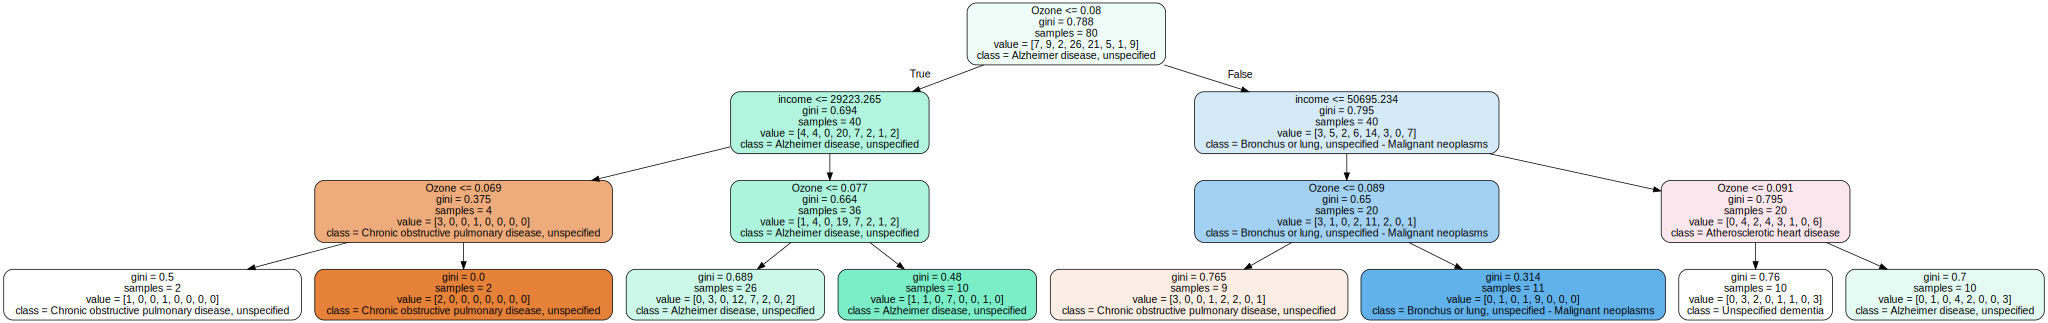

In [ ]:
dot_data = tree.export_graphviz(model, filled=True, rounded=True,
                                feature_names=['Ozone','income'],
                                class_names=y['Cause of death'],
                                    out_file=None)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
model.feature_importances_

array([0.6335888, 0.3664112])

In [ ]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators=25,
                                random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy:  0.5125
test accuracy:  0.2571428571428571


In [ ]:
avg_by_county['Cause of death'].value_counts()

Atherosclerotic heart disease                           38
Bronchus or lung, unspecified - Malignant neoplasms     29
Unspecified dementia                                    14
Acute myocardial infarction, unspecified                12
Alzheimer disease, unspecified                          11
Chronic obstructive pulmonary disease, unspecified       6
Atherosclerotic cardiovascular disease, so described     2
Senility                                                 1
Name: Cause of death, dtype: int64

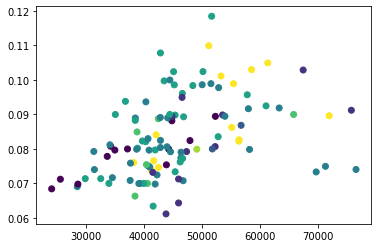

In [ ]:
plt.scatter(x=avg_by_county['per_capita_income_dollars'], y=avg_by_county['Ozone 2nd Max 1-hr'],
            c=avg_by_county['Cause of death'].astype('category').cat.codes)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
X = avg_by_county[['Ozone 2nd Max 1-hr','income_bucket_num']]
y = avg_by_county['Cause of death_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=1)

In [ ]:
avg_by_county.head()

,County,per_capita_income_dollars,Ozone 2nd Max 1-hr,Deaths,income_bucket,Cause of death,Cause of death_num,income_bucket_num
0,Adams County,38808.757315,0.084940,30.580034,Low,"Chronic obstructive pulmonary disease, unspeci...",5,0
1,Alachua County,41283.182674,0.073879,27.487759,Middle,Unspecified dementia,6,1
2,Anne Arundel County,61087.101394,0.092497,42.381496,High,"Bronchus or lung, unspecified - Malignant neop...",4,2
3,Arapahoe County,53581.454771,0.089864,33.739777,High,"Alzheimer disease, unspecified",1,2
4,Baker County,29856.418605,0.071395,15.441860,Low,"Bronchus or lung, unspecified - Malignant neop...",4,0


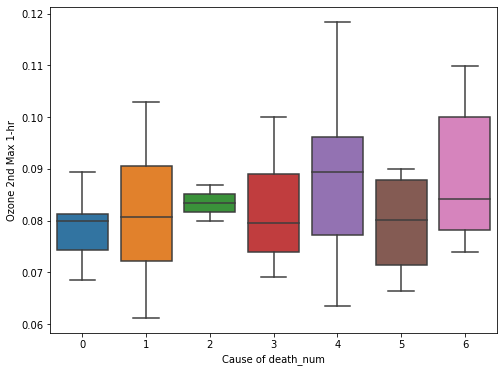

In [ ]:
import seaborn as sns
#Outlier detection technique through box plot
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(x='Cause of death_num',y='Ozone 2nd Max 1-hr',data=avg_by_county)

In [ ]:
avg_by_county['Cause of death_num'].value_counts

<bound method IndexOpsMixin.value_counts of 0      5
1      6
2      4
3      1
4      4
      ..
110    0
111    5
112    1
113    3
114    4
Name: Cause of death_num, Length: 113, dtype: int64>

In [ ]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
c=random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1,verbosity=1)

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
y_pred_test_1=c.predict(X_test)
y_pred_train_1=c.predict(X_train)
accuracy_test = accuracy_score(y_pred_test_1,y_test)
accuracy_train=accuracy_score(y_pred_train_1,y_train)

In [ ]:
print(accuracy_train)
print(accuracy_test)

0.46835443037974683
0.3235294117647059


In [ ]:
##Nueral Networks

In [ ]:
import tensorflow as tf
m1 = tf.keras.models.Sequential([
tf.keras.layers.Dense(256,activation=tf.nn.relu),# creating 512 nuerons and applying actv func at hd layer as relu
#tf.keras.layers.Dropout(0.2), #Randomly it will stop sending 20% of data to create a randomness.
tf.keras.layers.Dense(512,activation=tf.nn.relu),
#tf.keras.layers.Dropout(0.2),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1,activation=tf.nn.softmax)#for classification go for softmax in the last layer, else we choose for reg relu
])

In [ ]:
optimiser = tf.keras.optimizers.Adam()
m1.compile (optimizer= optimiser, loss='mse', metrics = ['accuracy'])

In [ ]:
m1.fit(X_test,y_test,epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 8ms/step - loss: 8.1434 - accuracy: 0.0901
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 8.1434 - accuracy: 0.0901
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 8.1746 - accuracy: 0.0901
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 7.9246 - accuracy: 0.0901
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 8.1850 - accuracy: 0.0797
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 7.9246 - accuracy: 0.0901
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 7.9246 - accuracy: 0.0901
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 7.9559 - accuracy: 0.0901
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 8.0913 - accuracy: 0.0901
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 8.2163 - accuracy: 0.0797
Epoch 11/50
2/2 [====================

In [ ]:
from keras.models import Sequential

from keras.layers import Dense
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_test, y_test,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 111ms/step - loss: 3.2734 - accuracy: 0.1557 - val_loss: 3.1797 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 3.4799 - accuracy: 0.0932 - val_loss: 3.0767 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 3.0665 - accuracy: 0.1557 - val_loss: 2.9024 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 2.8229 - accuracy: 0.2034 - val_loss: 2.5501 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 2.6833 - accuracy: 0.1909 - val_loss: 1.9564 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 2.3028 - accuracy: 0.1307 - val_loss: 1.7602 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 1.8029 - accuracy: 0.1057 - val_loss: 2.0133 - val_accuracy: 0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.35


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0  0  0  3  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.35      1.00      0.52        12
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5

    accuracy                           0.35        34
   macro avg       0.05      0.14      0.07        34
weighted avg       0.12      0.35      0.18        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_1_1 = logreg.predict(X_train)
accuracy_test = accuracy_score(y_pred,y_test)
accuracy_train=accuracy_score(y_pred_1_1,y_train)
print(accuracy_train)
print(accuracy_test)

0.3291139240506329
0.35294117647058826


In [ ]:
from sklearn.linear_model import LinearRegression
X = avg_by_county[['Ozone 2nd Max 1-hr','income_bucket_num']]
y = avg_by_county['Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=1)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()

In [ ]:
l=lr.fit(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

0.014781901130431098

In [ ]:
#Random forest initialization
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse')
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.score(X_test,y_test)

-0.26645838900398067

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6,36,num =6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
#Grid creation for hyperparameter tuning
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 12, 18, 24, 30, 36], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 20, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.9min finished


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             